<a href="https://colab.research.google.com/github/S-Devisri01/Python-colab/blob/main/Face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset not found. Creating dummy image dataset ✅
Dataset Ready ✅
Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Class Indices: {'with_mask': 0, 'without_mask': 1}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 868ms/step - accuracy: 0.4720 - loss: 2.9806 - val_accuracy: 0.5000 - val_loss: 0.7759
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4098 - loss: 0.7800 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 793ms/step - accuracy: 0.5434 - loss: 0.6910 - val_accuracy: 0.5000 - val_loss: 0.6926
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5041 - loss: 0.6887 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 798ms/step - accuracy: 0.5699 - loss: 0.6800 - val_accuracy: 0.5000 - val_loss: 0.6921
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 782ms/step - accuracy: 0.4965 - loss: 0.6835 - val_accuracy: 0.5000 - val_loss: 0.6915
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8666 - loss: 0.6637 - val_accuracy: 0.5000 - val_loss: 0.6901
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 795ms/step - accuracy: 0.7977 - loss: 0.6398 - val_accuracy: 0.5750 - val_loss: 0.6891
E

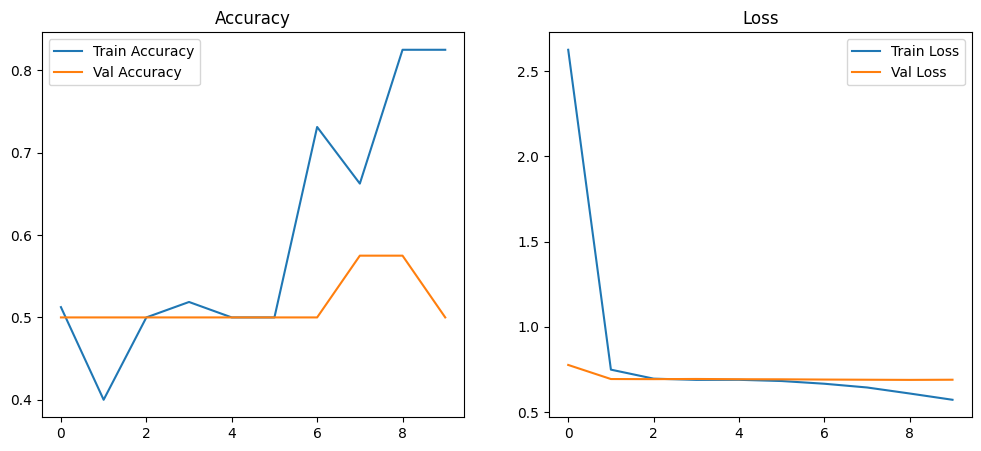

Model saved as face_mask_detection_cnn.h5 ✅
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Prediction: Without Mask ❌
Confidence: 0.48


In [1]:
# ==========================================================
# Face Mask Detection using CNN
# ==========================================================

# 1️⃣ Install required libraries (Colab safe)
# %%bash
# pip install -q tensorflow opencv-python matplotlib numpy

# ==========================================================
# 2️⃣ Imports
# ==========================================================
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# ==========================================================
# 3️⃣ Dataset Loading / Auto Dummy Dataset Creation
# ==========================================================
DATASET_DIR = "face_mask_dataset"
WITH_MASK_DIR = os.path.join(DATASET_DIR, "with_mask")
WITHOUT_MASK_DIR = os.path.join(DATASET_DIR, "without_mask")

if not os.path.exists(DATASET_DIR):
    print("Dataset not found. Creating dummy image dataset ✅")
    os.makedirs(WITH_MASK_DIR)
    os.makedirs(WITHOUT_MASK_DIR)

    # Create fake images
    for i in range(100):
        img_mask = np.random.randint(0, 255, (128, 128, 3), dtype=np.uint8)
        img_nomask = np.random.randint(0, 255, (128, 128, 3), dtype=np.uint8)

        cv2.imwrite(f"{WITH_MASK_DIR}/mask_{i}.jpg", img_mask)
        cv2.imwrite(f"{WITHOUT_MASK_DIR}/nomask_{i}.jpg", img_nomask)

print("Dataset Ready ✅")

# ==========================================================
# 4️⃣ Image Data Generator
# ==========================================================
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

print("Class Indices:", train_data.class_indices)

# ==========================================================
# 5️⃣ CNN Model Architecture
# ==========================================================
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ==========================================================
# 6️⃣ Train Model
# ==========================================================
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

# ==========================================================
# 7️⃣ Model Evaluation
# ==========================================================
loss, acc = model.evaluate(val_data)
print(f"\nValidation Accuracy: {acc:.4f}")

# ==========================================================
# 8️⃣ Plot Accuracy & Loss
# ==========================================================
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.show()

# ==========================================================
# 9️⃣ Save Model
# ==========================================================
model.save("face_mask_detection_cnn.h5")
print("Model saved as face_mask_detection_cnn.h5 ✅")

# ==========================================================
# 🔟 Predict Single Image
# ==========================================================
def predict_mask(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128,128))
    img = img / 255.0
    img = np.reshape(img, (1,128,128,3))

    prob = model.predict(img)[0][0]
    label = "With Mask 😷" if prob > 0.5 else "Without Mask ❌"

    print(f"Prediction: {label}")
    print(f"Confidence: {prob:.2f}")

# Test using one training image
sample_image = os.path.join(WITH_MASK_DIR, os.listdir(WITH_MASK_DIR)[0])
predict_mask(sample_image)
